<a href="https://colab.research.google.com/github/JohannesKarwou/notebooks/blob/main/Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JohannesKarwou/notebooks/main/data/summary_ddG.csv")

In [36]:
def bootstrap_function(x_values, y_values):
  # bootstrap metric
  def bootstrap_metric(fct, x_values, y_values):
      assert callable(fct) == True
      bootstrapped_metric = []
      # bootstrap metric to generate test distribution
      for _ in range(1000):
          indices = np.random.choice(range(0, len(x_values)), size=len(x_values), replace=True)
          x_selection = np.take(x_values, indices)
          y_selection = np.take(y_values, indices)
          r = fct(x_selection, y_selection)
          bootstrapped_metric.append(r)    

      # define 90% CI
      alpha = 10.0
      lower_p = alpha / 2.0
      # get value at or near percentile (take a look at the definition of percentile if 
      # you have less than 100 values to make sure you understand what is happening)
      lower = np.percentile(bootstrapped_metric, lower_p)
      upper_p = (100 - alpha) + (alpha / 2.0)
      upper = np.percentile(bootstrapped_metric, upper_p)
      # calculate true mean
      mean = fct(x_values, y_values)

      return mean, lower, upper

  # bootstrap MAE
  mean, lower, upper = bootstrap_metric(mean_absolute_error, x_values, y_values)
  print(f'MAE:  {round(mean, 2):.2f} [{round(lower,2):.2f}, {round(upper,2):.2f}], average error {round(abs(lower-upper),2)}')

  # bootstrap RMSE
  def calc_rmse(x_values, y_values):
      from sklearn.metrics import mean_squared_error
      return np.sqrt(mean_squared_error(x_values, y_values))
  mean, lower, upper = bootstrap_metric(calc_rmse, x_values, y_values)
  print(f'RMSE:  {round(mean, 2):.2f} [{round(lower,2):.2f}, {round(upper,2):.2f}]')
  plt.show()



In [37]:
## all values ###
x_values = np.asarray_chkfinite(df["literature"][0:75])
y_values = np.asarray_chkfinite(df['TF'][0:75])

print(f'for all ddG values')
bootstrap_function(x_values, y_values)

## Galectin ###
x_values = np.asarray_chkfinite(df["literature"][0:7])
y_values = np.asarray_chkfinite(df['TF'][0:7])

print(f'ddG values for Galectin')
bootstrap_function(x_values, y_values)

## CDK2 ###
x_values = np.asarray_chkfinite(df["literature"][7:20])
y_values = np.asarray_chkfinite(df['TF'][7:20])

print(f'ddG values for CDK2')
bootstrap_function(x_values, y_values)

## 2RA0 ###
x_values = np.asarray_chkfinite(df["literature"][20:31])
y_values = np.asarray_chkfinite(df['TF'][20:31])

print(f'ddG values for 2RA)')
bootstrap_function(x_values, y_values)

## TYK2 ###
x_values = np.asarray_chkfinite(df["literature"][31:46])
y_values = np.asarray_chkfinite(df['TF'][31:46])

print(f'ddG values for TYK2')
bootstrap_function(x_values, y_values)

## JNK1 ###
x_values = np.asarray_chkfinite(df["literature"][46:75])
y_values = np.asarray_chkfinite(df['TF'][46:75])

print(f'ddG values for JNK1')
bootstrap_function(x_values, y_values)



for all ddG values
MAE:  0.87 [0.73, 1.03], average error 0.3
RMSE:  1.18 [1.00, 1.36]
ddG values for Galectin
MAE:  0.49 [0.30, 0.67], average error 0.37
RMSE:  0.58 [0.39, 0.74]
ddG values for CDK2
MAE:  0.80 [0.46, 1.20], average error 0.75
RMSE:  1.12 [0.70, 1.47]
ddG values for 2RA)
MAE:  1.02 [0.70, 1.39], average error 0.69
RMSE:  1.24 [0.76, 1.72]
ddG values for TYK2
MAE:  1.37 [0.91, 1.80], average error 0.9
RMSE:  1.74 [1.23, 2.12]
ddG values for JNK1
MAE:  0.68 [0.51, 0.89], average error 0.37
RMSE:  0.91 [0.64, 1.15]


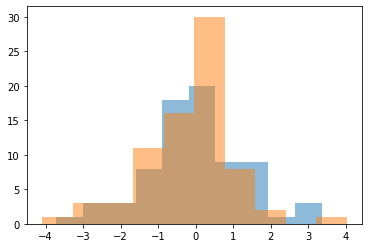

In [45]:
plt.hist(x_values, alpha=0.5)
plt.hist(y_values, alpha=0.5)
plt.show()

In [25]:
df[31:47]

,System,ligand,TF,TF std,literature,pmx,pmx std,schroedinger,schroedinger std,AMBER TI,...,Unnamed: 14,RMSE to pmx/AMBER TI,Unnamed: 16,Unnamed: 17,Unnamed: 18,UE,groesser 1,groesser 1.5,groesser 2,Unnamed: 23
31,TYK2,ejm_31,0.000000,0.000000,0.00,0.000000,NaN,0.00,0.00,NaN,...,NaN,0.000000,NaN,NaN,NaN,0.00,0.0,0.0,0.0,TYK2
32,TYK2,ejm_42,0.527546,0.550000,0.24,-1.129673,NaN,-0.12,0.50,NaN,...,NaN,2.746375,NaN,NaN,NaN,0.29,0.0,0.0,0.0,TYK3
33,TYK2,ejm_43,-2.875996,0.910000,-1.28,-3.142850,NaN,-1.64,0.47,NaN,...,NaN,0.071211,NaN,NaN,NaN,1.60,1.0,1.5,0.0,TYK4
34,TYK2,ejm_44,-4.090541,NaN,-2.12,-5.550000,NaN,-2.81,0.86,NaN,...,NaN,2.130021,NaN,NaN,NaN,1.97,1.0,1.5,0.0,TYK5
35,TYK2,ejm_45,0.366629,0.560000,0.02,-0.855620,NaN,-0.20,0.76,NaN,...,NaN,1.493892,NaN,NaN,NaN,0.35,0.0,0.0,0.0,TYK6
36,TYK2,ejm_46,-0.798234,0.680000,1.77,-0.688320,NaN,0.81,0.24,NaN,...,NaN,0.012081,NaN,NaN,NaN,2.57,1.0,1.5,2.0,TYK7
37,TYK2,ejm_47,-0.483860,0.190000,0.16,-2.829760,NaN,-0.57,0.76,NaN,...,NaN,5.503246,NaN,NaN,NaN,0.64,0.0,0.0,0.0,TYK8
38,TYK2,ejm_48,-1.599788,0.090000,-0.54,-1.417270,NaN,-1.18,0.72,NaN,...,NaN,0.033313,NaN,NaN,NaN,1.06,1.0,0.0,0.0,TYK9
39,TYK2,ejm_49,-1.963316,0.600000,-1.79,-2.648120,NaN,-1.01,0.29,NaN,...,NaN,0.468957,NaN,NaN,NaN,0.17,0.0,0.0,0.0,TYK10
40,TYK2,ejm_50,0.718925,0.330000,-0.56,-1.037260,NaN,-0.30,0.41,NaN,...,NaN,3.084184,NaN,NaN,NaN,1.28,1.0,0.0,0.0,TYK11
